<a href="https://colab.research.google.com/github/saravanakumarrc/langchain-rag/blob/main/langchain_azure_openai_pdf_loader_multiple_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.2 MB/s eta 0:00:00


In [2]:
%pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.8 MB/s eta 0:00:00


In [3]:
import getpass
import os

if not os.environ.get("AZURE_OPENAI_API_KEY"):
  os.environ["AZURE_OPENAI_API_KEY"] = getpass.getpass("Enter API key for Azure: ")

from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint='https://dai-team3-openai.openai.azure.com/',
    azure_deployment='gpt-4o-mini',
    openai_api_version='2024-10-01-preview',
)

Enter API key for Azure: ··········


In [4]:
from langchain_openai import AzureOpenAIEmbeddings

embeddings = AzureOpenAIEmbeddings(
    azure_endpoint='https://dai-team3-openai.openai.azure.com/',
    azure_deployment='text-embedding-3-small',
    openai_api_version='2024-10-01-preview',
)

In [5]:
%pip install -qU langchain-core

In [6]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)

In [23]:
file_path = (
    "/content/GoldmanSachsima.pdf"
)

In [8]:
%pip install -qU pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.2 MB/s eta 0:00:00


In [27]:
import os
from langchain_community.document_loaders import PyPDFLoader

# Path to the folder containing the PDFs
folder_path = "/content/sample_data/pdfs"

# List to store all pages from all PDFs
all_pages = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a PDF
    if filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)

        # Load the PDF
        loader = PyPDFLoader(file_path)

        # Load pages asynchronously
        async for page in loader.alazy_load():
            all_pages.append(page)

# Now `all_pages` contains pages from all PDFs
print(f"Total pages loaded: {len(all_pages)}")


Total pages loaded: 90


In [32]:
print(f"{all_pages[35].metadata}\n")
print(all_pages[35].page_content)

{'source': '/content/sample_data/pdfs/4690.pdf', 'page': 0}

Exhibit B 
  
INVESTMENT MANAGEMENT AGREEMENT 
 
 This is an investment management agreement (“Agreement”) made as of the date of the later of the 
signatures of the parties (the “Effective Date”) between the Board of Supervisors of Dinwiddie County, Virginia 
acting as Trustee for the  Evelyn Abrahams Scholarship Fund  and the Pamplin Social Services Trust Fund 
(collectively “Client” or “you”) and Thompson, Siegel & Walmsley LLC (the “Adviser”).  By this Agreement, 
Client employs Adviser as investment manager for Client’s account (the “Account”), on the following terms 
and conditions: 
 
1. Management Discretionary A uthority:  Adviser shall have full power to supervise and direct the 
investment of the Account in any and all securities, assets and other investments (“Investments”), and to make 
and implement investment decisions, all without prior consultation with Clie nt, in accordance with such 
objectives, guidelines

In [33]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(all_pages)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 273 sub-documents.


In [38]:
all_splits[1]

Document(metadata={'source': '/content/sample_data/pdfs/GoldmanSachsima.pdf', 'page': 0, 'start_index': 826}, page_content='that are backed by Agency MBS, or MBS derivatives ;\nWHEREAS, the FRB-NY is the Reserve Bank authorized by the FOMC to carry out the\ndomestic policy objective through its management of SOMA;\nWHEREAS, the FRB-NY, after consultation and approval by the FOMC, determined that\nthe purchase and management of the SOMA Agency MBS would be done through the use of one or\nmore investment managers;\nWHEREAS, as a result of a competitive bidding process Manager has been selected as one\nof several investment managers to support the FRB-NY in its implementation of the FOMC\'s\ndirective;\nNOW, THEREFORE, it is agreed as follows:\n1 Appointment as Manager\nThe FRB-NY hereby appoints the Manager to manage, supervise and direct the investment\nof a portion of the SOMA account as specified by the FRB-NY ("Account") under the terms and\nconditions set forth herein.By execution o

In [39]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['402c0475-20c5-41cf-95bd-a5b7a8325d22', 'b69bea7b-dd17-49d5-955b-bfee39755e33', '01995a67-fff1-49c2-9ac4-a672d8428946']


In [40]:
len(document_ids)

273

In [13]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


/usr/local/lib/python3.10/dist-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [14]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [15]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [16]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

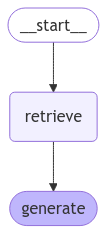

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
result = graph.invoke({"question": "who is the Reserve Bank authorized by the FOMC to carry out the domestic policy objective through its management of SOMA?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='f80942e9-ff48-431d-ab1d-7323c2e35865', metadata={'source': '/content/GoldmanSachsima.pdf', 'page': 0, 'start_index': 826}, page_content='that are backed by Agency MBS, or MBS derivatives ;\nWHEREAS, the FRB-NY is the Reserve Bank authorized by the FOMC to carry out the\ndomestic policy objective through its management of SOMA;\nWHEREAS, the FRB-NY, after consultation and approval by the FOMC, determined that\nthe purchase and management of the SOMA Agency MBS would be done through the use of one or\nmore investment managers;\nWHEREAS, as a result of a competitive bidding process Manager has been selected as one\nof several investment managers to support the FRB-NY in its implementation of the FOMC\'s\ndirective;\nNOW, THEREFORE, it is agreed as follows:\n1 Appointment as Manager\nThe FRB-NY hereby appoints the Manager to manage, supervise and direct the investment\nof a portion of the SOMA account as specified by the FRB-NY ("Account") under the terms and\ncondit